# Импортирование библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble, model_selection, metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Чтение, предобработка и анализ данных

In [3]:
bioresponce = pd.read_csv('train(random_forest).csv', header = 0, sep = ',')

In [4]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [5]:
bioresponce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [6]:
bioresponce.shape

(3751, 1777)

In [7]:
bioresponce.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [8]:
bioresponce.dtypes

Activity      int64
D1          float64
D2          float64
D3          float64
D4          float64
             ...   
D1772         int64
D1773         int64
D1774         int64
D1775         int64
D1776         int64
Length: 1777, dtype: object

In [9]:
print('Кол-во объектов c меткой +1:{: .2f}'.format(len(bioresponce[bioresponce['Activity']==1]) / len(bioresponce['Activity'])))
print('Кол-во объектов c меткой 0:{: .2f}'.format(len(bioresponce[bioresponce['Activity']==0]) / len(bioresponce['Activity'])))

Кол-во объектов c меткой +1: 0.54
Кол-во объектов c меткой 0: 0.46


# Выборка объектов

In [10]:
X = bioresponce.drop(['Activity'], axis = 1)
X.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


# Выборка меток

In [11]:
Y = bioresponce[['Activity']]
Y.head()

,Activity
0,1
1,1
2,1
3,1
4,0


# Анализ доли правильных ответов от размера обучающей выборки

## Глубина = 2

In [12]:
rf_classifier = ensemble.GradientBoostingClassifier(max_depth = 2, n_estimators = 40, random_state = 1)

In [13]:
%%time
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, X, Y, 
                                                                       train_sizes=np.arange(0.1,1, 0.1), 
                                                                       cv=5, scoring='accuracy')

Wall time: 1min 16s


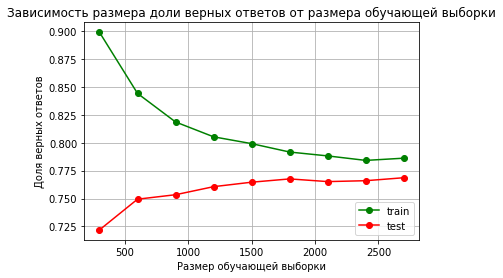

In [14]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'g', marker = 'o', label = 'train')
plt.plot(train_sizes, test_scores.mean(axis = 1), color = 'r', marker = 'o', label = 'test')
plt.title('Зависимость размера доли верных ответов от размера обучающей выборки')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Доля верных ответов')
plt.legend(loc = 'lower right')
plt.show()

## Глубина = 5

In [15]:
rf_classifier = ensemble.GradientBoostingClassifier(max_depth = 5, n_estimators = 20, random_state = 1)

In [16]:
%%time
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, X, Y, 
                                                                       train_sizes=np.arange(0.1,1, 0.1), 
                                                                       cv=5, scoring='accuracy')

Wall time: 3min 17s


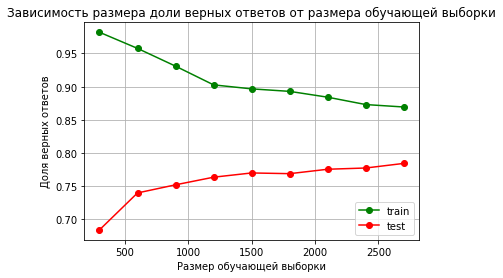

In [17]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'g', marker = 'o', label = 'train')
plt.plot(train_sizes, test_scores.mean(axis = 1), color = 'r', marker = 'o', label = 'test')
plt.title('Зависимость размера доли верных ответов от размера обучающей выборки')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Доля верных ответов')
plt.legend(loc = 'lower right')
plt.show()

# Зависимость качества обучения от кол-ва деревьев

In [18]:
number_trees = np.linspace(50, 120, 20)
number_trees

array([ 50.        ,  53.68421053,  57.36842105,  61.05263158,
        64.73684211,  68.42105263,  72.10526316,  75.78947368,
        79.47368421,  83.15789474,  86.84210526,  90.52631579,
        94.21052632,  97.89473684, 101.57894737, 105.26315789,
       108.94736842, 112.63157895, 116.31578947, 120.        ])

In [19]:
%%time
accuracy = []
for number_tree in number_trees:
    classifier_of_tree = ensemble.GradientBoostingClassifier(max_depth = 2, n_estimators = int(number_tree), random_state = 1)
    score = model_selection.cross_val_score(classifier_of_tree, X, Y, scoring = 'accuracy')
    accuracy.append(score)

Wall time: 4min 55s


In [20]:
accuracy = np.asmatrix(accuracy)

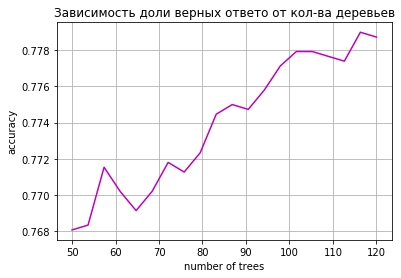

In [21]:
plt.plot(number_trees, accuracy.mean(axis = 1), color = 'm', label = 'GradientBoosting')
plt.grid(True)
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.title('Зависимость доли верных ответо от кол-ва деревьев')
plt.show()

# Разбиение выборки на обучающую и тестовую

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 1)

# Возможные параметры GradientBoostingClassifier

In [23]:
classifier = ensemble.GradientBoostingClassifier()

In [24]:
classifier.get_params().keys()

dict_keys(['criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

# Поиск лучших параметров для обучения модели

In [25]:
classifier = ensemble.GradientBoostingClassifier(max_depth = 2, n_estimators = 20, random_state = 1)

In [26]:
parameters_grid = {
    'learning_rate' : np.arange(0.01, 0.1, 0.01),
    'max_features' : np.arange(30, 60, 2),
}

In [27]:
cv = model_selection.StratifiedShuffleSplit(20, test_size = 0.2, random_state = 1)

In [28]:
grid_cv = model_selection.RandomizedSearchCV(classifier, parameters_grid, cv = cv, scoring = 'accuracy', n_iter = 20)

In [29]:
%%time
grid_cv.fit(X_train, y_train)

Wall time: 1min 31s


RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=20, random_state=1, test_size=0.2,
            train_size=None),
                   error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=2,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_sampl...
                                                        validation_fraction=0.

In [30]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.7070833333333333
{'max_features': 40, 'learning_rate': 0.06999999999999999}


In [31]:
print(grid_cv.best_estimator_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.06999999999999999, loss='deviance',
                           max_depth=2, max_features=40, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# Лучшая модель

In [42]:
classification_best = ensemble.GradientBoostingClassifier(
    learning_rate = 0.01, max_depth = 2, n_estimators = 500, random_state = 1
)

# Обучение и предсказание по лучшей модели

In [43]:
%%time
classification_best.fit(X_train, y_train)
predictions = classification_best.predict(X_test)

# Метрики:

### Jaccard - score

In [44]:
print('{: .2f}'.format(metrics.jaccard_score(y_test, predictions)))

 0.67


### Confusion - matrix

In [45]:
matrix = metrics.confusion_matrix(y_test, predictions)
print(matrix)

[[253  89]
 [ 76 333]]


### classification - report

In [46]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       342
           1       0.79      0.81      0.80       409

    accuracy                           0.78       751
   macro avg       0.78      0.78      0.78       751
weighted avg       0.78      0.78      0.78       751

